# Predicting heart disease using machine learning
This notebook looks in to using various machine learning and data science libraries in an attempt to build a machine learning model  capable of predicting whether or not someone has heart disease based on their medical attributes. 
## 1. Problem Definition
In a statement, 
> Given clinical parameters, can we predict or not if they have heart disease?

## 2. Data
The original data came from the UCI Machine learning repository.

## 3. Evaluation
> A score of at least 95% accuracy is required to pursue the project further.

## 4. Features
**Create Data Dictionary**
This is where we'll get different information about features in our data.
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [79]:
## Preparing the tools
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### Data Exploration
Learn more about data and become a subject matter expert.
1) What questions are you trying to solve?
2) What kind of data do we have and how do we treat different types?
3) What's missing from the data and how do you deal with it?
4) What are the outliers and why should you care about them?
5) How can you add, change or remove features to get more out your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

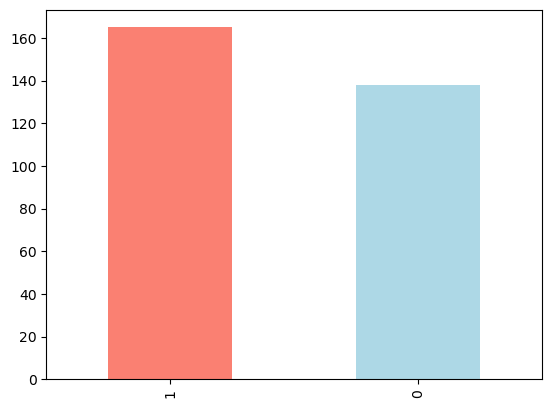

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


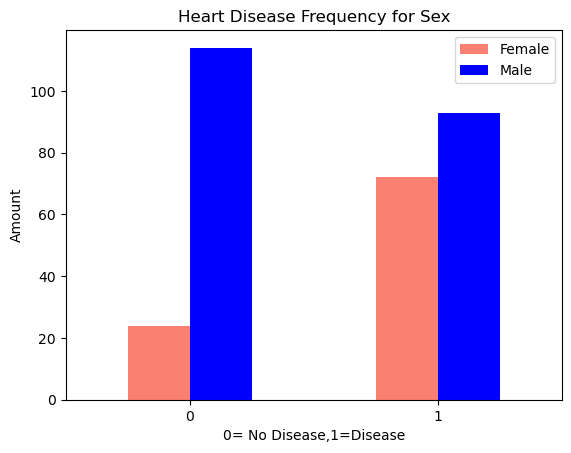

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","blue"]);
plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0= No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

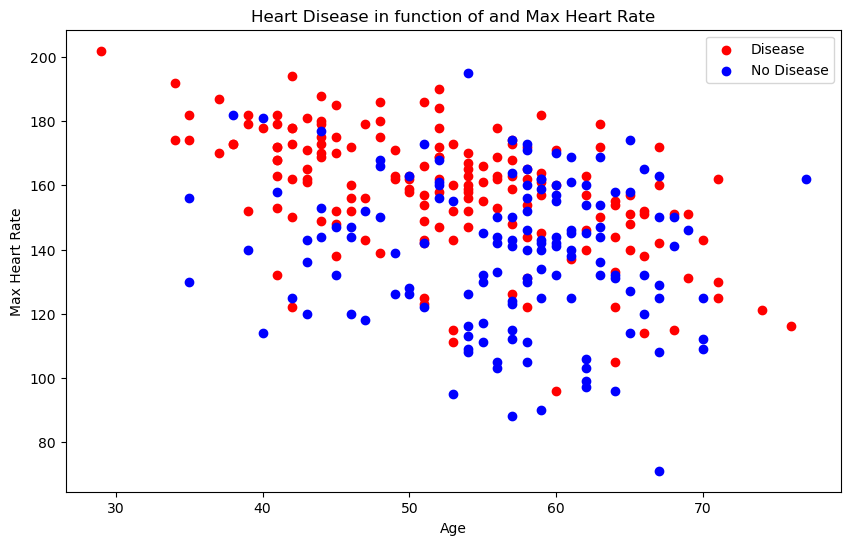

In [14]:
#Create another figure 
plt.figure(figsize=(10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red");
#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue");
plt.title("Heart Disease in function of and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

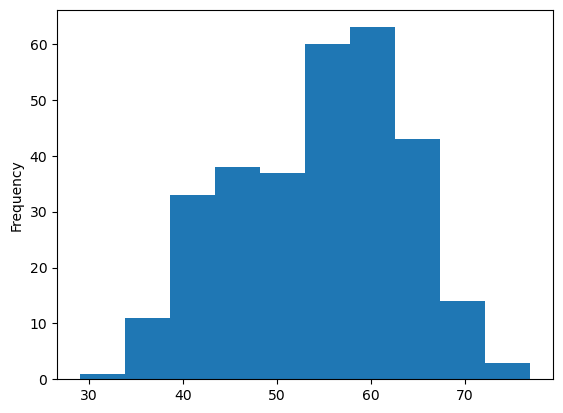

In [15]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

In [16]:
#Heart disease frequency per Chest Pain Type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


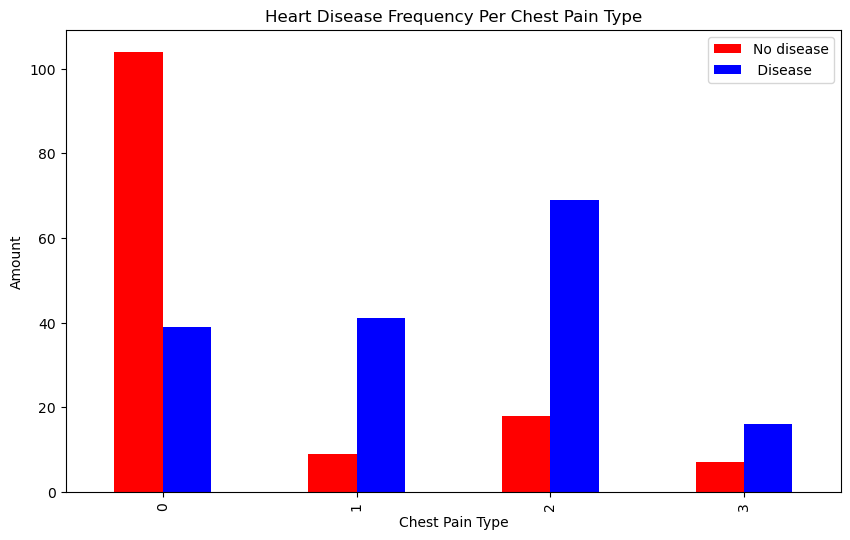

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease"," Disease"]);

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


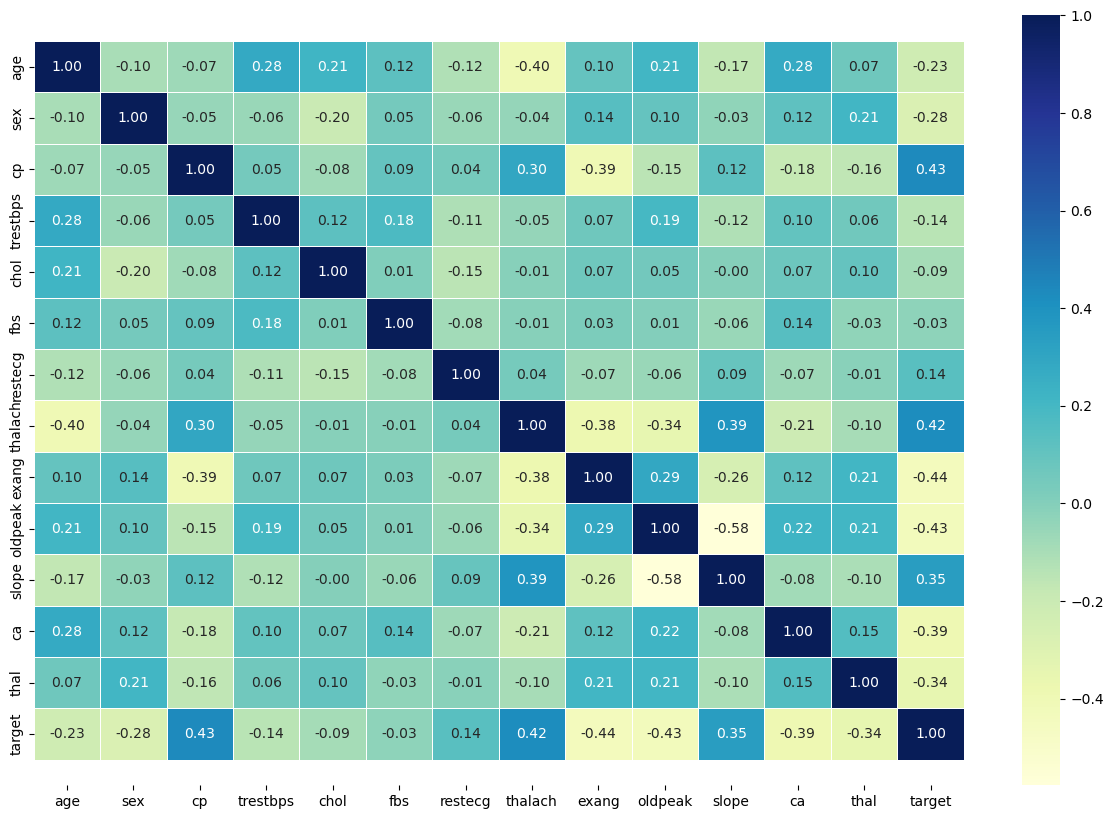

In [19]:
#Let's make our correlation matrix look a little better
corr_matrix=df.corr()
fig,ax =plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);

## Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#Split data into x and y
X=df.drop("target",axis=1)
y=df["target"]

In [22]:
#Split data into train and test sets
np.random.seed(42)
#Split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train,len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [24]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [25]:
# Time to build a machine learning model.
#1) Logistic Regression
#2) K-Nearest Neighbor
#3) Random Forest Classifier

In [26]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}
def fitandscore(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and append its score  to model_scores
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [27]:
model_score=fitandscore(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_score

C:\Users\avson\Desktop\milestone1\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

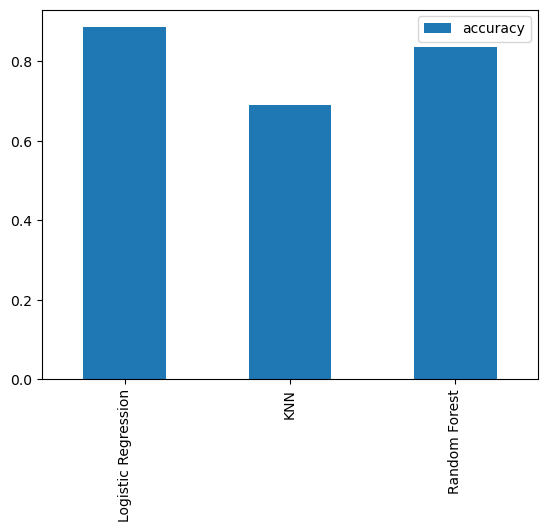

In [28]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar();

### Now we have a baseline model. We know that a model's first predictions aren't the ones we should base our results on.
#Let's look at the following:
#Hyperparameter tuning 
#Feature importance
#Confusion matrix
#Cross validation
#Recall
#Precision
#F1 score
#Classification report
#ROC curve
#Area under the curve

### Hyperparameter Tuning

In [29]:
#Let's tune KNN
train_scores=[]
test_scores=[]
#Create a list of different values for n_neighbors
neighbors=range(1,21)
#Set up kNN instance
knn=KNeighborsClassifier()
#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score on the test data: 75.41%


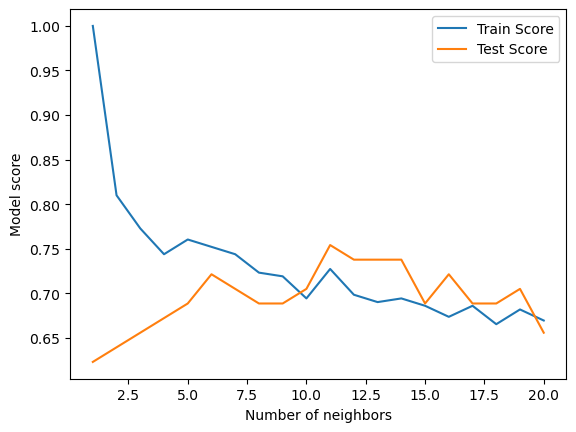

In [32]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();
print(f"Maximum score on the test data: {max(test_scores)*100:.2f}%")

In [33]:
#Discard KNN

## Hyperparameter Tuning with Randomized Search CV

We're going to tune:
LogisticRegression()
RandomForestClassifier()
Using RandomSearchCV()

In [34]:
#Create a hyperparameter grid for logisticalRegression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
"max_depth":[None,3,5,10],
"min_samples_split":np.arange(2,20,2),
"min_samples_leaf":np.arange(1,20,2)}

In [35]:
#Tune logistic regression
np.random.seed(42)
#Setup random hyp search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
#Fit random hyp search model
rs_log_reg.fit(X_train,y_train)
rs_log_reg

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
#Now we've tuned logistic Regression let's do the same for the RandomForestClassifier()
#Tune logistic regression
np.random.seed(42)
#Setup random hyp search for LogisticRegression
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
#Fit random hyp search model
rs_rf.fit(X_train,y_train)
rs_rf

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
#Evaluate the randomized search RandomForestClassifier model score
rs_rf.score(X_test,y_test)

0.8688524590163934

In [39]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [40]:
#1) By hand
#2) RandomizedSearchCV
#3) GridSearchCV

### Hyperparameter tuning using grid seach CV
Since LogisticalRegression() model provides the best score, we try to improve them using gridsearchcv

In [41]:
#Different hyperparamters for our LogisticRegressionModel
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [62]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [44]:
#Evaluating our tuned machine learining classifier, beyond accuracy
#ROC Curve and AUC score
#Confusion matrix
#Classification Report
#Precision
#Recall
#F1-score
#To make comparisions and evaluate our trained model,first we need to make predictions.

In [45]:
#Make predictions with trained  model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [47]:
#Plot ROC Curve and calculate and calculate AUC metric
RocCurveDisplay(fpr=gs_log_reg,tpr=X_test);

In [48]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


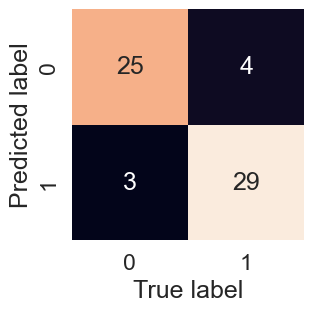

In [49]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [50]:
#Now we've got a roc curve, an auc metric and a confusion matrix, let's get a classification report as well as cross-validated precision,as well as precision score

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation
cross_val_score()

In [63]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [65]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)

In [66]:
#Cross validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [67]:
#Recall Score
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_precision)
cv_recall

0.8207936507936507

In [68]:
#F1 score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

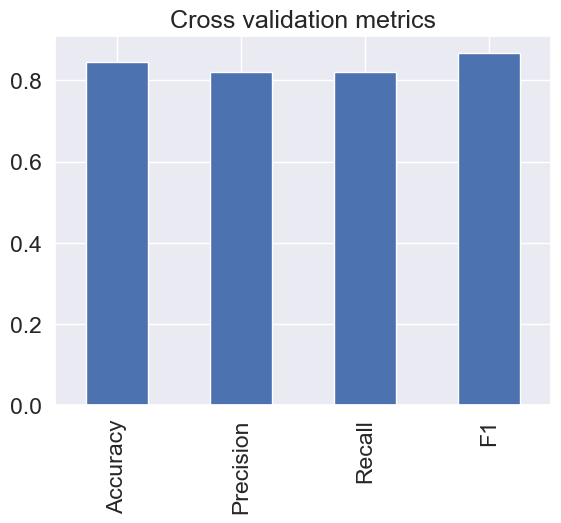

In [69]:
#Visualize cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross validation metrics",legend=False);

### Feature Importance
Which features contributed the most to the outcomes of the model and how did they contributed?
Finding feature importance is different for each model

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train);

In [72]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [73]:
#Match coefs of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

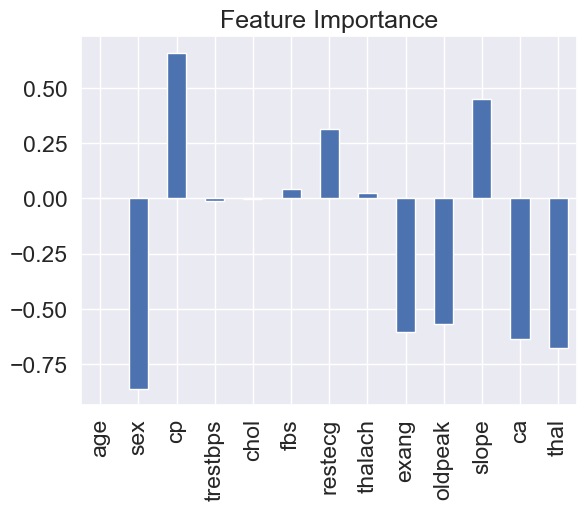

In [74]:
#Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [75]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [76]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation
Could we collect more data?
Could we try a better model? Try CatBoost or XGBoost

In [81]:
catclf=CatBoostClassifier()
catclf.fit(X_train,y_train)
catclf.score(X_test,y_test)

C:\Users\avson\Desktop\milestone1\env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.005621
0:	learn: 0.6884219	total: 151ms	remaining: 2m 31s
1:	learn: 0.6846994	total: 154ms	remaining: 1m 16s
2:	learn: 0.6804470	total: 157ms	remaining: 52.1s
3:	learn: 0.6762242	total: 159ms	remaining: 39.7s
4:	learn: 0.6716784	total: 161ms	remaining: 32.1s
5:	learn: 0.6672808	total: 163ms	remaining: 27s
6:	learn: 0.6639958	total: 165ms	remaining: 23.3s
7:	learn: 0.6601980	total: 166ms	remaining: 20.6s
8:	learn: 0.6563766	total: 167ms	remaining: 18.4s
9:	learn: 0.6525103	total: 168ms	remaining: 16.7s
10:	learn: 0.6483670	total: 170ms	remaining: 15.3s
11:	learn: 0.6448827	total: 173ms	remaining: 14.3s
12:	learn: 0.6412767	total: 175ms	remaining: 13.3s
13:	learn: 0.6374286	total: 177ms	remaining: 12.5s
14:	learn: 0.6335427	total: 179ms	remaining: 11.7s
15:	learn: 0.6288052	total: 180ms	remaining: 11.1s
16:	learn: 0.6250489	total: 182ms	remaining: 10.5s
17:	learn: 0.6209495	total: 184ms	remaining: 10s
18:	learn: 0.6181899	total: 185ms	remaining: 9.56s
19:	learn: 0.

214:	learn: 0.3134157	total: 567ms	remaining: 2.07s
215:	learn: 0.3124251	total: 570ms	remaining: 2.07s
216:	learn: 0.3119032	total: 571ms	remaining: 2.06s
217:	learn: 0.3111628	total: 573ms	remaining: 2.06s
218:	learn: 0.3106289	total: 575ms	remaining: 2.05s
219:	learn: 0.3096439	total: 577ms	remaining: 2.05s
220:	learn: 0.3087572	total: 579ms	remaining: 2.04s
221:	learn: 0.3080645	total: 581ms	remaining: 2.04s
222:	learn: 0.3077284	total: 583ms	remaining: 2.03s
223:	learn: 0.3068238	total: 584ms	remaining: 2.02s
224:	learn: 0.3060865	total: 586ms	remaining: 2.02s
225:	learn: 0.3053261	total: 588ms	remaining: 2.02s
226:	learn: 0.3049830	total: 590ms	remaining: 2.01s
227:	learn: 0.3043831	total: 592ms	remaining: 2s
228:	learn: 0.3036527	total: 594ms	remaining: 2s
229:	learn: 0.3029137	total: 596ms	remaining: 2s
230:	learn: 0.3023233	total: 599ms	remaining: 1.99s
231:	learn: 0.3019126	total: 601ms	remaining: 1.99s
232:	learn: 0.3011656	total: 603ms	remaining: 1.98s
233:	learn: 0.3004942

389:	learn: 0.2260882	total: 940ms	remaining: 1.47s
390:	learn: 0.2257320	total: 943ms	remaining: 1.47s
391:	learn: 0.2253825	total: 945ms	remaining: 1.47s
392:	learn: 0.2250201	total: 947ms	remaining: 1.46s
393:	learn: 0.2247848	total: 949ms	remaining: 1.46s
394:	learn: 0.2245612	total: 951ms	remaining: 1.46s
395:	learn: 0.2242187	total: 953ms	remaining: 1.45s
396:	learn: 0.2239822	total: 955ms	remaining: 1.45s
397:	learn: 0.2236989	total: 957ms	remaining: 1.45s
398:	learn: 0.2235183	total: 959ms	remaining: 1.44s
399:	learn: 0.2230596	total: 961ms	remaining: 1.44s
400:	learn: 0.2227511	total: 963ms	remaining: 1.44s
401:	learn: 0.2224446	total: 965ms	remaining: 1.43s
402:	learn: 0.2220862	total: 967ms	remaining: 1.43s
403:	learn: 0.2216683	total: 969ms	remaining: 1.43s
404:	learn: 0.2212574	total: 971ms	remaining: 1.43s
405:	learn: 0.2210520	total: 973ms	remaining: 1.42s
406:	learn: 0.2206644	total: 975ms	remaining: 1.42s
407:	learn: 0.2204110	total: 977ms	remaining: 1.42s
408:	learn: 

557:	learn: 0.1787021	total: 1.31s	remaining: 1.04s
558:	learn: 0.1784697	total: 1.31s	remaining: 1.04s
559:	learn: 0.1782168	total: 1.31s	remaining: 1.03s
560:	learn: 0.1781041	total: 1.32s	remaining: 1.03s
561:	learn: 0.1779691	total: 1.32s	remaining: 1.03s
562:	learn: 0.1776914	total: 1.32s	remaining: 1.02s
563:	learn: 0.1774607	total: 1.32s	remaining: 1.02s
564:	learn: 0.1771881	total: 1.32s	remaining: 1.02s
565:	learn: 0.1770475	total: 1.33s	remaining: 1.02s
566:	learn: 0.1768182	total: 1.33s	remaining: 1.01s
567:	learn: 0.1765421	total: 1.33s	remaining: 1.01s
568:	learn: 0.1763251	total: 1.33s	remaining: 1.01s
569:	learn: 0.1760322	total: 1.34s	remaining: 1.01s
570:	learn: 0.1757642	total: 1.34s	remaining: 1s
571:	learn: 0.1754087	total: 1.34s	remaining: 1s
572:	learn: 0.1751396	total: 1.34s	remaining: 1000ms
573:	learn: 0.1749395	total: 1.34s	remaining: 997ms
574:	learn: 0.1747539	total: 1.34s	remaining: 995ms
575:	learn: 0.1745199	total: 1.35s	remaining: 992ms
576:	learn: 0.174

741:	learn: 0.1419284	total: 1.7s	remaining: 591ms
742:	learn: 0.1417437	total: 1.7s	remaining: 589ms
743:	learn: 0.1415807	total: 1.7s	remaining: 586ms
744:	learn: 0.1413847	total: 1.71s	remaining: 584ms
745:	learn: 0.1413049	total: 1.71s	remaining: 582ms
746:	learn: 0.1410806	total: 1.71s	remaining: 579ms
747:	learn: 0.1409042	total: 1.71s	remaining: 577ms
748:	learn: 0.1407720	total: 1.71s	remaining: 574ms
749:	learn: 0.1405259	total: 1.72s	remaining: 572ms
750:	learn: 0.1403464	total: 1.72s	remaining: 570ms
751:	learn: 0.1401728	total: 1.72s	remaining: 567ms
752:	learn: 0.1398976	total: 1.72s	remaining: 565ms
753:	learn: 0.1397434	total: 1.72s	remaining: 563ms
754:	learn: 0.1395691	total: 1.73s	remaining: 560ms
755:	learn: 0.1392868	total: 1.73s	remaining: 558ms
756:	learn: 0.1392358	total: 1.73s	remaining: 556ms
757:	learn: 0.1391223	total: 1.73s	remaining: 553ms
758:	learn: 0.1390406	total: 1.73s	remaining: 551ms
759:	learn: 0.1388841	total: 1.74s	remaining: 549ms
760:	learn: 0.1

918:	learn: 0.1145556	total: 2.07s	remaining: 183ms
919:	learn: 0.1144583	total: 2.08s	remaining: 181ms
920:	learn: 0.1143388	total: 2.08s	remaining: 178ms
921:	learn: 0.1141903	total: 2.08s	remaining: 176ms
922:	learn: 0.1141102	total: 2.08s	remaining: 174ms
923:	learn: 0.1139413	total: 2.08s	remaining: 171ms
924:	learn: 0.1138215	total: 2.09s	remaining: 169ms
925:	learn: 0.1136710	total: 2.09s	remaining: 167ms
926:	learn: 0.1135234	total: 2.09s	remaining: 165ms
927:	learn: 0.1133317	total: 2.09s	remaining: 162ms
928:	learn: 0.1131934	total: 2.09s	remaining: 160ms
929:	learn: 0.1130751	total: 2.1s	remaining: 158ms
930:	learn: 0.1129860	total: 2.1s	remaining: 156ms
931:	learn: 0.1127993	total: 2.1s	remaining: 153ms
932:	learn: 0.1126122	total: 2.1s	remaining: 151ms
933:	learn: 0.1124583	total: 2.1s	remaining: 149ms
934:	learn: 0.1124221	total: 2.11s	remaining: 146ms
935:	learn: 0.1122122	total: 2.11s	remaining: 144ms
936:	learn: 0.1121434	total: 2.11s	remaining: 142ms
937:	learn: 0.112

0.8360655737704918

In [83]:
y_preds=catclf.predict(X_test);

In [84]:
print(confusion_matrix(y_test,y_preds));

[[24  5]
 [ 5 27]]
